# Plotting Hysteresis and other things for ESS pi meeting 2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.linear_model import LinearRegression
import os
import matplotlib.collections as mcoll

# shear stress
shear_stress_2021 = pd.read_csv('mobile_shear_stress_2021.csv', parse_dates=['time'], index_col='time')
shear_stress_2022 = pd.read_csv('mobile_shear_stress_2022.csv', parse_dates=['time'], index_col='time')
shear_stress_2023 = pd.read_csv('mobile_shear_stress_2023.csv', parse_dates=['time'], index_col='time')

# nutrient data
storm_directory = 'summer_storms'
storms = {} # storm dictionary
for filename in os.listdir(storm_directory):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(storm_directory, filename) # construct the full file path
        df = pd.read_csv(file_path)                         # read the CSV file into a data frame
        df = df.dropna(subset=['Date_Time'])                # drop rows where 'Date/Time' is NaN  
        df['Date_Time'] = pd.to_datetime(df['Date_Time'])   # convert to datetime format
        df = df.set_index('Date_Time')                      # set date time as the index 
        df = df.dropna(how='all', axis=1)                   # drop columns where all values are NaN
        key = filename[:-4]                                 # remove the '.csv' from the filename to use as the dictionary key
        storms[key] = df                                    # store the data frame in the dictionary

In [2]:
storms.keys()

dict_keys(['st1_down', 'st1_up', 'st2_down', 'st3_down', 'st4_down', 'st4_up', 'st5_down', 'st5_up', 'st6_up', 'st7_down', 'st7_up'])

In [3]:
def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

def colorline(x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0), linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """
    # Ensure z is a 1D array with the same length as x and y
    if z is None:
        z = np.arange(len(x))  # Use the index of the point as the color
    elif not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z] * len(x))
    else:
        z = np.asarray(z)

    # Remove NaN values
    mask = ~np.isnan(y)
    x, y = x[mask], y[mask]

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha)
    ax = plt.gca()
    ax.add_collection(lc)
    return lc

In [4]:
# merge the shear stress dataframes to the storm dataframes 
shear_stress_2021 = shear_stress_2021.resample('1T').interpolate()
shear_stress_2022 = shear_stress_2022.resample('1T').interpolate()
shear_stress_2023 = shear_stress_2023.resample('1T').interpolate()

storms['st1_down'] = pd.merge(storms['st1_down'], shear_stress_2021, left_index=True, right_index=True, how='left')
storms['st1_up'] = pd.merge(storms['st1_up'], shear_stress_2021, left_index=True, right_index=True, how='left')
storms['st2_down'] = pd.merge(storms['st2_down'], shear_stress_2022, left_index=True, right_index=True, how='left')
storms['st3_down'] = pd.merge(storms['st3_down'], shear_stress_2022, left_index=True, right_index=True, how='left')
storms['st4_down'] = pd.merge(storms['st4_down'], shear_stress_2023, left_index=True, right_index=True, how='left')
storms['st4_up'] = pd.merge(storms['st4_up'], shear_stress_2023, left_index=True, right_index=True, how='left')
storms['st5_down'] = pd.merge(storms['st5_down'], shear_stress_2023, left_index=True, right_index=True, how='left')
storms['st5_up'] = pd.merge(storms['st5_up'], shear_stress_2023, left_index=True, right_index=True, how='left')
storms['st6_up'] = pd.merge(storms['st6_up'], shear_stress_2023, left_index=True, right_index=True, how='left')
storms['st7_down'] = pd.merge(storms['st7_down'], shear_stress_2023, left_index=True, right_index=True, how='left')
storms['st7_up'] = pd.merge(storms['st7_up'], shear_stress_2023, left_index=True, right_index=True, how='left')

In [5]:
storms['st1_down']

,SS (uL/L),SRP (mg/L),TP (mg/L),DOC (mg/L),POC (mg/L),PP (mg/L),fDOM,Turbidity,P2C,P3C,P2C_depth,P3C_depth,depth,0
Date_Time,,,,,,,,,,,,,,
2021-07-23 15:50:00,339.78248,0.062,0.360,9.18,51.660,1.19,249.27,91.20,2723.170033,2724.256253,16.103333,26.825267,26.825267,69.099470
2021-07-23 16:09:00,457.12000,0.088,0.445,12.63,50.228,1.63,236.32,256.63,2723.179359,2724.262816,17.035940,27.481640,27.481640,69.884853
2021-07-23 16:40:00,152.79000,0.088,0.248,13.39,14.502,0.77,377.89,76.14,2723.185071,2724.266408,17.607100,27.840833,27.840833,71.166266
2021-07-23 16:55:00,168.45000,0.083,0.214,13.00,11.681,0.50,413.81,100.94,2723.183121,2724.265220,17.412100,27.722033,27.722033,71.786305
2021-07-23 19:19:00,43.15000,0.053,0.097,12.87,6.411,0.10,515.85,22.13,2723.154470,2724.243058,14.546960,25.505847,25.505847,76.279338
2021-07-23 21:02:00,17.70000,0.047,0.077,11.55,4.805,0.07,506.48,11.14,2723.145268,2724.232969,13.626833,24.496887,24.496887,48.483626


### Plots

C:\Users\nicol\AppData\Local\Temp\ipykernel_21092\2921950024.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc, ax=ax)


C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_down_SS_uL_L.jpg


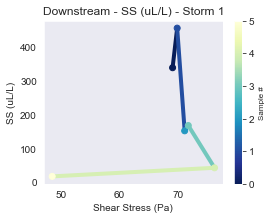

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_down_SRP_mg_L.jpg


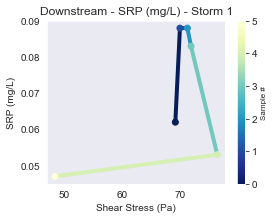

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_down_TP_mg_L.jpg


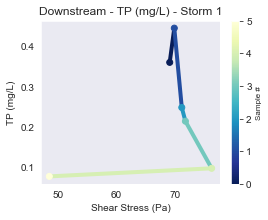

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_down_DOC_mg_L.jpg


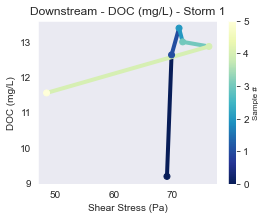

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_down_POC_mg_L.jpg


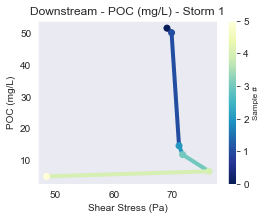

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_down_PP_mg_L.jpg


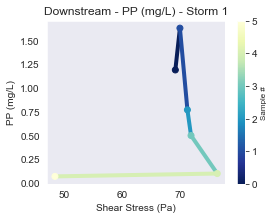

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_down_fDOM.jpg


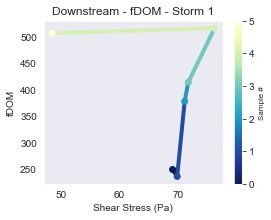

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_down_Turbidity.jpg


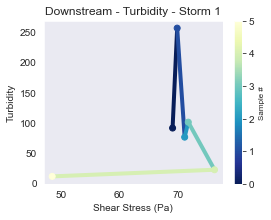

In [9]:
# single plot - downstream reach - storm 1
sns.set_style("darkgrid")
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st1_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    z = np.linspace(0, 1, len(storms['st1_down']['0']))
    num_points = len(storms['st1_down']['0'])
    colorline(storms['st1_down']['0'], storms['st1_down'][constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(storms['st1_down']['0'], storms['st1_down'][constituent], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Downstream - {constituent} - Storm 1', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Shear Stress (Pa)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_down_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

C:\Users\nicol\AppData\Local\Temp\ipykernel_21092\3459036494.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc, ax=ax)


C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_up_SS_uL_L.jpg


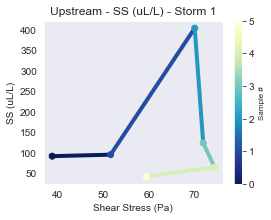

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_up_SRP_mg_L.jpg


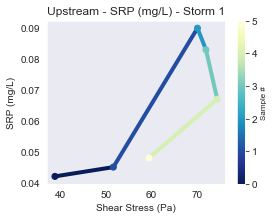

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_up_TP_mg_L.jpg


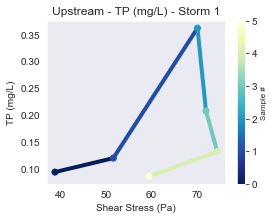

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_up_DOC_mg_L.jpg


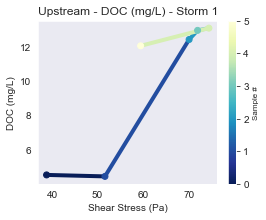

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_up_POC_mg_L.jpg


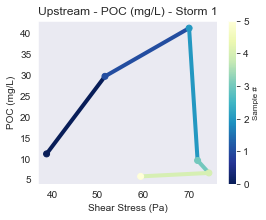

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_up_PP_mg_L.jpg


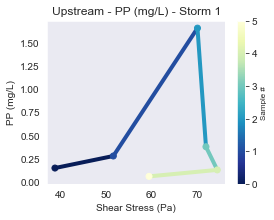

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_up_fDOM.jpg


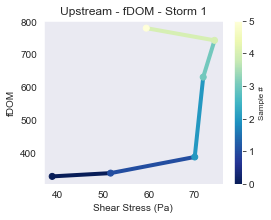

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_up_Turbidity.jpg


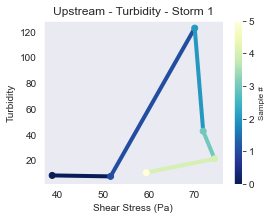

In [10]:
# single plot - upstream reach - storm 1
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st1_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    z = np.linspace(0, 1, len(storms['st1_up']['0']))
    num_points = len(storms['st1_up']['0'])
    colorline(storms['st1_up']['0'], storms['st1_up'][constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(storms['st1_up']['0'], storms['st1_up'][constituent], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Upstream - {constituent} - Storm 1', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Shear Stress (Pa)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_up_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

C:\Users\nicol\AppData\Local\Temp\ipykernel_21092\1929416194.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()
C:\Users\nicol\AppData\Local\Temp\ipykernel_21092\1929416194.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc, ax=ax)


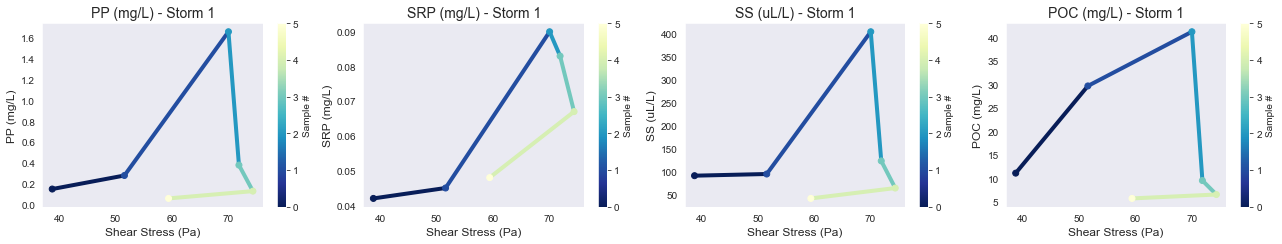

In [29]:
# All constituents - storm 1 - upstream
constituents = ['PP (mg/L)', 'SRP (mg/L)', 'SS (uL/L)', 'POC (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3.5), constrained_layout=True)
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st1_down'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax
    z = np.linspace(0, 1, len(storms['st1_up']['0']))
    num_points = len(storms['st1_up']['0'])
    colorline(storms['st1_up']['0'], storms['st1_up'][constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(storms['st1_up']['0'], storms['st1_up'][constituent], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 1', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Shear Stress (Pa)", fontsize=12)

plt.tight_layout()
fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/all_summer.jpg", 
            dpi=2000)
plt.show()